In [297]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kaggle.api.kaggle_api_extended import KaggleApi

In [298]:
api = KaggleApi()
api.authenticate()

In [299]:
kg.api.dataset_download_files(dataset="ehtishamsadiq/uncleaned-laptop-price-dataset",path="./dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ehtishamsadiq/uncleaned-laptop-price-dataset


In [300]:
data = pd.read_csv("dataset/laptopData.csv")
data = data.drop(columns=['Unnamed: 0'])

In [301]:
data = data.dropna().drop_duplicates()
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce')
data['Ram'] = data['Ram'].str.extract(r'(\d+)').astype(int)
data['Weight'] = data['Weight'].str.extract(r'([\d.]+)').astype(float)
data['CPUSpeed'] = data['Cpu'].str.extract(r'(\d+\.\d+)GHz').astype(float)

In [302]:
def parse_memory(x):
    try:
        parts = x.replace(' ', '').split('+')
        sizes = []
        for p in parts:
            match = re.search(r'(\d+)', p)
            if match:
                sizes.append(int(match.group(1)))
            else:
                sizes.append(0)
        memtype = 'Hybrid' if len(sizes)>1 else ('SSD' if 'SSD' in x else 
                   'HDD' if 'HDD' in x else 'Flash')
        primary = sizes[0] if len(sizes) > 0 else 0
        secondary = sizes[1] if len(sizes) > 1 else 0
        return pd.Series([memtype, primary, secondary])
    except:
        return pd.Series(['Unknown', 0, 0])

data[['memory_type','PrimaryGB','SecondaryGB']] = data['Memory'].apply(parse_memory)

In [303]:
# OS Simplification
data['OpSys'] = data['OpSys'].str.lower().apply(
    lambda x: 'macOS' if 'mac' in x else
              'Windows' if 'win' in x else
              'Linux' if 'linux' in x else
              'Chrome' if 'chrome' in x else
              'N/A' if 'no os' in x else 'Other')


In [304]:

# Convert price to int
data['Price'] = data['Price'].round().astype(int)


In [305]:
# -----------------------------
# Data Visualization Section
# -----------------------------

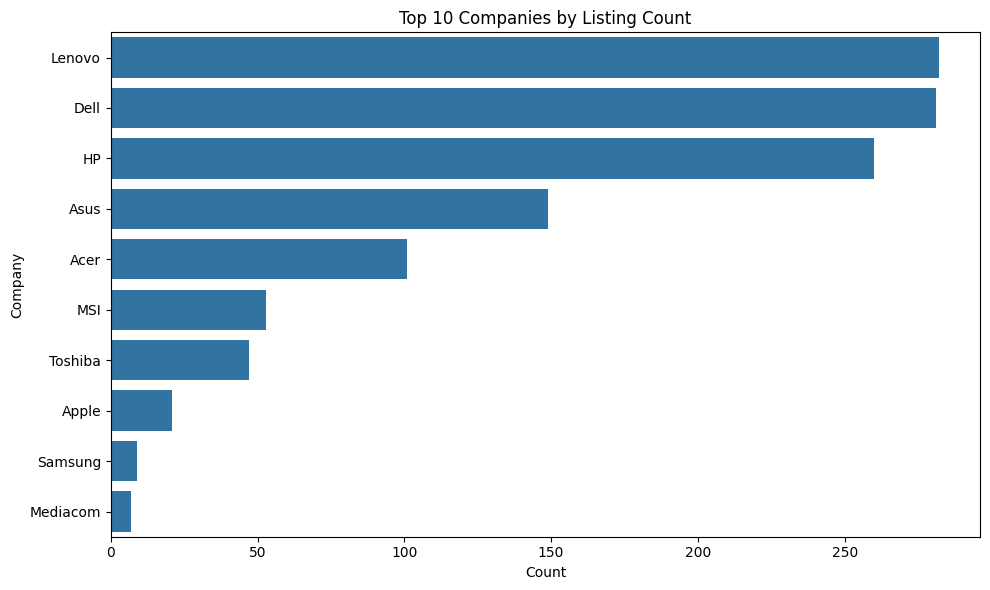

In [306]:
# Plot 1: Top 10 Companies
plt.figure(figsize=(10,6))
sns.countplot(y='Company', data=data, order=data['Company'].value_counts().index[:10])
plt.title("Top 10 Companies by Listing Count")
plt.xlabel("Count")
plt.ylabel("Company")
plt.tight_layout()
plt.show()

/tmp/ipykernel_9705/1530609947.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ram', data=data, palette='Blues_d')


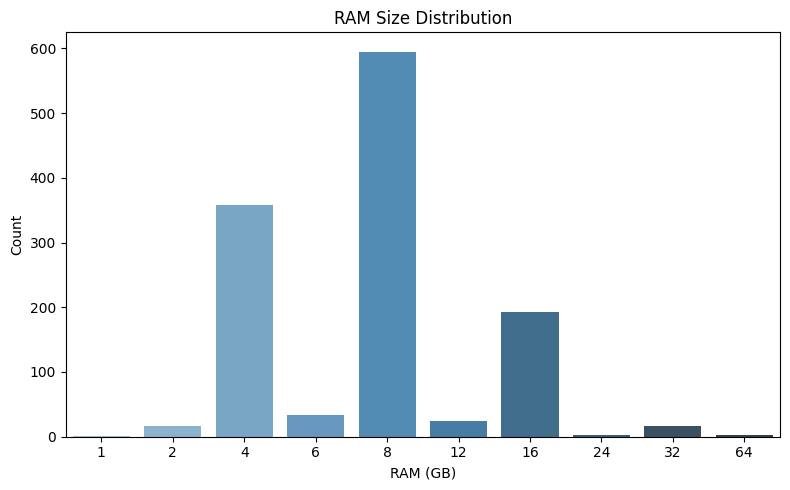

In [307]:
# Plot 2: RAM Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Ram', data=data, palette='Blues_d')
plt.title("RAM Size Distribution")
plt.xlabel("RAM (GB)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

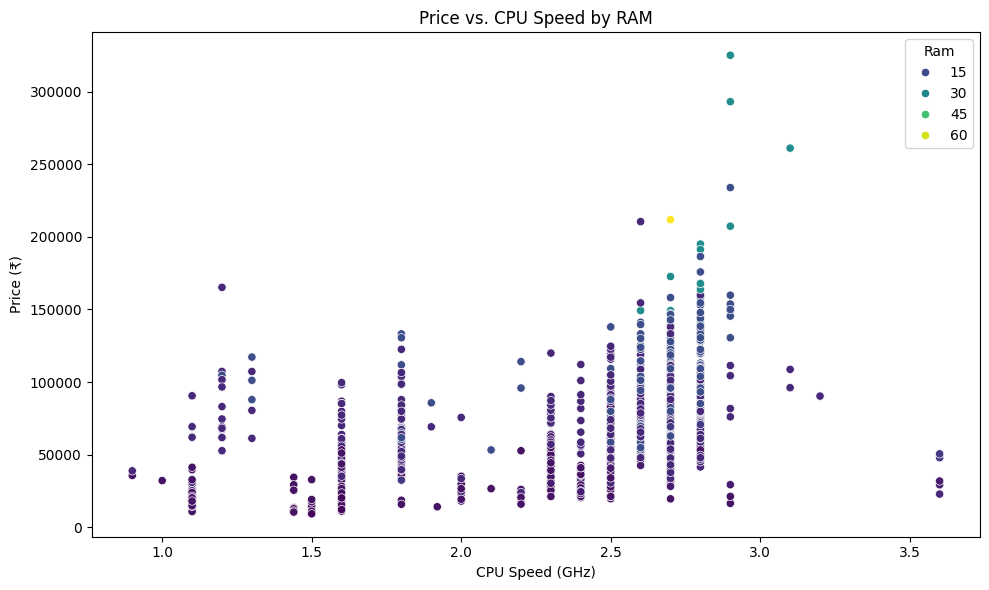

In [308]:
# Plot 3: Price vs. CPU Speed
plt.figure(figsize=(10,6))
sns.scatterplot(x='CPUSpeed', y='Price', hue='Ram', data=data, palette='viridis')
plt.title("Price vs. CPU Speed by RAM")
plt.xlabel("CPU Speed (GHz)")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

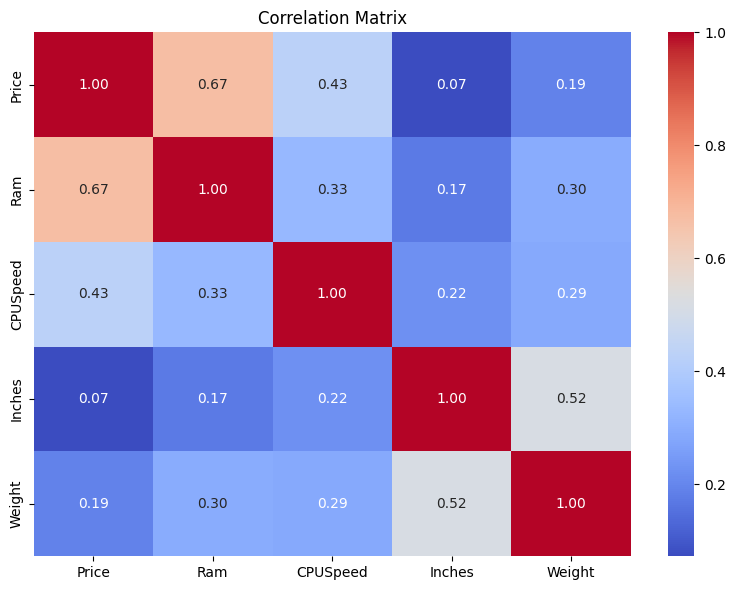

In [309]:
# Plot 4: Correlation Heatmap
plt.figure(figsize=(8,6))
numeric_cols = ['Price','Ram','CPUSpeed','Inches','Weight']
# for col in numeric_cols:
#     data[col] = pd.to_numeric(data[col], errors='coerce')
numeric = data[numeric_cols].dropna()
plt.figure(figsize=(8,6))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


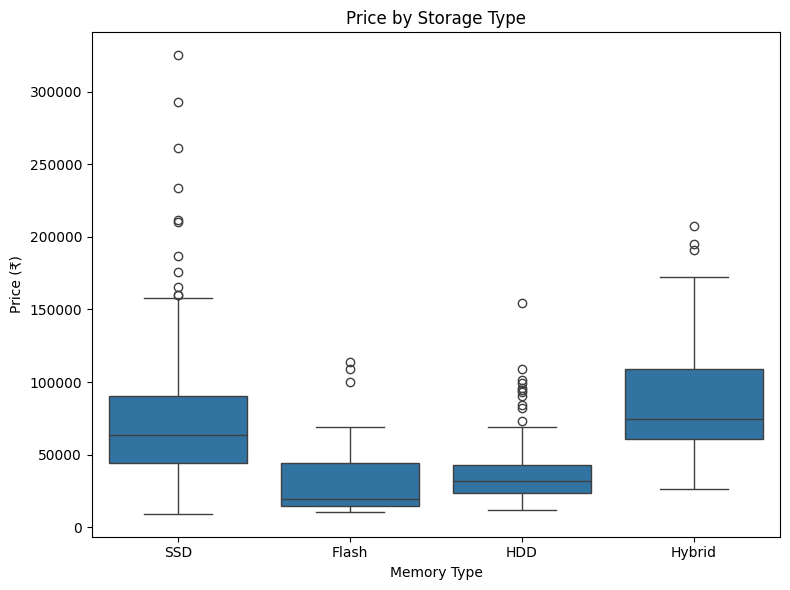

In [310]:
# Plot 5: Price by Storage Type
plt.figure(figsize=(8,6))
sns.boxplot(x='memory_type', y='Price', data=data)
plt.title("Price by Storage Type")
plt.xlabel("Memory Type")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.show()

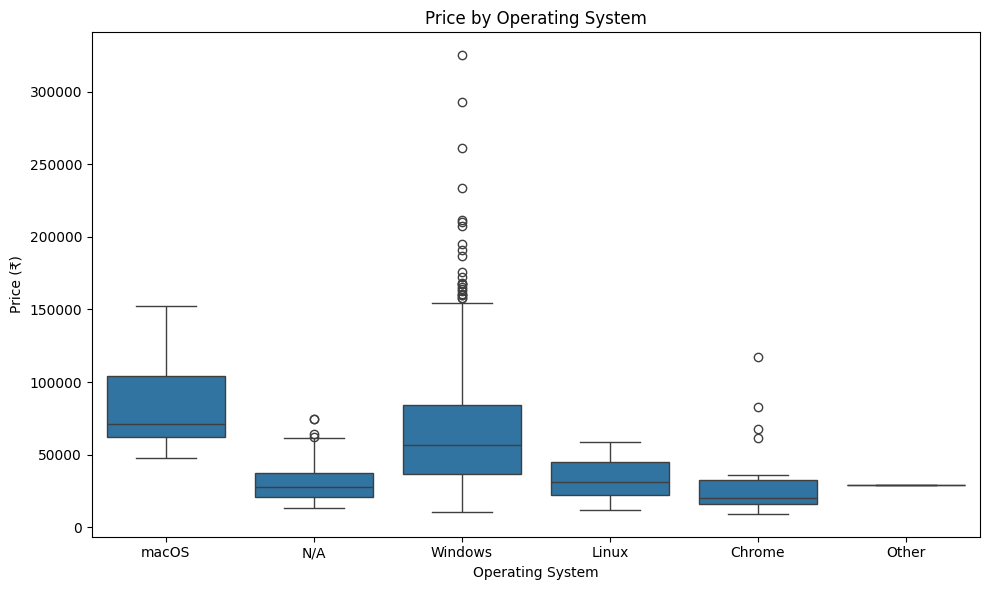

In [311]:
# Plot 6: Price by Operating System
plt.figure(figsize=(10,6))
sns.boxplot(x='OpSys', y='Price', data=data)
plt.title("Price by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Price (₹)")
plt.tight_layout()
plt.show()
